# Investigating ready biodegradability (RB) with `mordred` descriptors

This notebook if part of the series about how to use `chembee` for modelling the biodegradability of chemical compounds in a binary classification model. 

© Julian M. Kleber

In [1]:
import matplotlib



In [2]:
# Loading the data
data_set_path = "../datasets/AllPublicnew.sdf"


In [3]:
# Get Lipinski features for the visualizations
from chembee.preparation.processing import calculate_lipinski_desc
from chembee.datasets.BioDegDataSet import BioDegDataSet

target = "ReadyBiodegradability"
split_ratio = 0.8
DataSet = BioDegDataSet(split_ratio=split_ratio, data_set_path=data_set_path, target=target)
DataSet.data = calculate_lipinski_desc(DataSet.data, DataSet.mols)
lip_data = DataSet.clean_data(DataSet.data)

3192it [00:07, 445.43it/s]


# Calculate the mordred descriptors from the paper

In [4]:
from chembee.preparation.processing import calculate_mordred_descriptors
from chembee.datasets.BioDegDataSet import BioDegDataSet

prefix = "mordred"
target = "ReadyBiodegradability"
file_name = "mordred_polar_plot_full"
DataSet = BioDegDataSet(split_ratio=split_ratio, data_set_path=data_set_path, target=target)
DataSet.data = calculate_mordred_descriptors(list(DataSet.mols))

  1%|█▎                                                                                     | 46/3192 [00:04<05:53,  8.91it/s]

/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|█████████▌                                                                            | 356/3192 [00:44<17:14,  2.74it/s]

/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 13%|██████████▉                                                                           | 404/3192 [00:52<16:43,  2.78it/s]

/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 14%|████████████▍                                                                         | 462/3192 [01:02<09:09,  4.97it/s]

/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|█████████████████████████████████████████████████████████████████████████████████████| 3192/3192 [07:09<00:00,  7.43it/s]


In [5]:
DataSet.data.to_csv( "../datasets/OnlyFeaturesAllFranceMordred.csv")

In [6]:
PlainBioDeg= BioDegDataSet(data_set_path=data_set_path, target=target)
y_col = PlainBioDeg.data["ReadyBiodegradability"]

In [7]:
from chembee.datasets.BioDegDataSet import BioDegDataSet
import pandas as pd
from chembee.utils.file_utils import save_json_to_file, make_full_filename

file_name = "feature_extraction"
prefix = "mordred"
target = "ReadyBiodegradability"
data_set_path = "../datasets/AllPublicnew.sdf"
DataSet = BioDegDataSet(split_ratio=0.8, data_set_path=data_set_path, target=target)

y_col = DataSet.data["ReadyBiodegradability"]
DataSet.data = pd.read_csv("../datasets/OnlyFeaturesAllFranceMordred.csv")
DataSet.data = DataSet.data.drop(columns = ["Unnamed: 0"])
print(DataSet.data.shape)
for col in DataSet.data.columns.tolist():
    data_col = pd.to_numeric(DataSet.data[col], errors = "coerce")
    DataSet.data[col] = data_col
DataSet.data = DataSet.data.fillna(0)
DataSet.data["ReadyBiodegradability"] = y_col
DataSet.save_data_csv(DataSet.data, file_name="clean_mordred_france", prefix="../datasets/")
X_data = DataSet.data.drop(columns=[target]).to_numpy()
y_data = DataSet.data[target].to_numpy()

/tmp/ipykernel_109280/3050709139.py:12: DtypeWarning: Columns (16,54,55,56,57,58,59,60,61,62,138,147,153,154,155,156,165,174,183,192,201,210,219,228,234,235,236,237,238,239,240,241,242,261,262,263,264,265,266,267,268,269,342,343,344,345,354,363,369,370,371,372,381,390,399,408,417,426,435,444,450,451,452,458,459,460,466,467,468,474,475,476,484,492,500,508,516,524,532,540,546,547,548,554,555,556,562,563,564,570,571,572,580,588,596,604,612,620,628,636,642,643,648,649,679,692,705,718,731,744,757,770,816,817,833,859,867,868,869,875,883,884,885,932,1097,1099,1176,1178,1275,1276,1277,1278,1349,1350,1570,1766,1794,1795,1796,1797,1825) have mixed types. Specify dtype option on import or set low_memory=False.
  DataSet.data = pd.read_csv("../datasets/OnlyFeaturesAllFranceMordred.csv")


(3192, 1826)


In [8]:
print(X_data.shape)

(3192, 1826)


# Check for feature importances 

In [9]:

from chembee.actions.feature_extraction import (
    get_feature_importances,
    filter_importance_by_std,
)
from chembee.plotting.feature_extraction import plot_feature_importances


result_json = get_feature_importances(
    X_data, y_data, feature_names=DataSet.data.drop(columns=target).columns.to_list()
)
file_name_json   = make_full_filename(file_name="80-20_mordred_feature_importance.json", prefix=prefix)
save_json_to_file(
    result_json, file_name=file_name_json
)

plot_feature_importances(result_json, file_name, prefix=prefix)


In [10]:
result_json = filter_importance_by_std(result_json, cut_off=0.01)
file_name = make_full_filename( file_name="80-20_mordred_filtered_feature_importance.json", prefix=prefix)
save_json_to_file(
    result_json, file_name="80-20_mordred_filtered_feature_importance.json", 
)

In [11]:
import numpy as np
sorted_std = np.array(result_json["std"])
indices = np.argpartition(sorted_std, -len(sorted_std))[-len(sorted_std):]
print(indices)


[38  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37  0 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]


In [12]:
len(sorted_std)

72

In [13]:
DataSet.data = DataSet.data[DataSet.data.columns.to_numpy()[indices]]
DataSet.data["ReadyBiodegradability"] = y_col

In [14]:
assert DataSet.X_train.shape[1] == DataSet.X_test.shape[1]

# Cross Validation

Now fit several algorithms for the cross validation, then benchmark them again and validate the fit afterwards

In [15]:
from chembee.actions.cross_validation import (
    screen_cross_validation_grid_search,
)
from chembee.datasets.BioDegDataSet import BioDegDataSet
from chembee.config.calibration.random_forest import RandomForestClassifier
from chembee.config.calibration.knn import KNNClassifier
from chembee.config.calibration.mlp_classifier import NeuralNetworkClassifierRELU
from chembee.config.calibration.svc import NaivelyCalibratedSVCRBF

# you have to use the child class directly, the grandchild doesn't work
split_ratio = 0.8
scores = [
    "precision_macro",
    "recall_macro",
    "accuracy",
]

names = [
    "rf",
    "knn",
    "NeuralNetworkClassifier",
    "NaivelyCalibratedSVCRBF",
]  # is confusing with the real dict keys
clf_list = [
    RandomForestClassifier,
    KNNClassifier,
    NeuralNetworkClassifierRELU,
    NaivelyCalibratedSVCRBF,
]
(

    DataSet.X_train,
    DataSet.X_test,
    DataSet.y_train,
    DataSet.y_test,
) = DataSet.make_train_test_split(
    DataSet.data, split_ratio=split_ratio, y_col=target, shuffle=True
)
X_data = DataSet.data.drop(columns=[target]).to_numpy()
y_data = DataSet.data[target].to_numpy()
assert DataSet.X_train.shape[1] == DataSet.X_test.shape[1]

In [16]:
X_data.shape

(3192, 72)

In [17]:
assert DataSet.X_train.shape[1] == DataSet.X_test.shape[1]
fitted_clf, result_clf = screen_cross_validation_grid_search(
    scores=scores,
    clf_list=clf_list,
    X_train=DataSet.X_train.to_numpy(),
    X_test=DataSet.X_test.to_numpy(),
    y_train=DataSet.y_train.to_numpy().astype(np.int32),
    y_test=DataSet.y_test.to_numpy().astype(np.int32),
    refit="accuracy",
)

/home/julian/MasterThesis/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/julian/MasterThesis/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/julian/MasterThesis/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "/home/julian/MasterThesis/venv/lib/python3.10/site-packages/sklearn/neural_network/_m

In [18]:
import numpy as np
import json
def save_json_to_file(
    dictionary, prefix: str = "", file_name: str = None, suffix: str = ""
):
    def convert(o):
        if isinstance(o, np.generic):
            return o.item()
    if file_name is None:
        file_name = make_date_file_name(suffix=".json")
    with open(file_name, "w") as out_file:
        json.dump(dictionary, out_file, default=convert)

save_json_to_file(fitted_clf, prefix=prefix, file_name ="80-20_reduced_mordred_cv.json")

In [19]:
from chembee.config.calibration.knn import KNeighborsClassifierAlgorithm
from chembee.config.calibration.random_forest import RandomForestClassifierAlgorithm
from chembee.config.calibration.mlp_classifier import MLPClassifierAlgorithm
from chembee.config.calibration.svc import NaivelyCalibratedSVC

from sklearn.neighbors import KNeighborsClassifier

from chembee.utils.file_utils import load_json_from_file

fitted_clf = load_json_from_file("reduced_mordred_cv.json")
rf = RandomForestClassifierAlgorithm(**fitted_clf["rfc"]["best_parameters"])
knn = KNeighborsClassifierAlgorithm(**fitted_clf["knn"]["best_parameters"])
nnc = MLPClassifierAlgorithm(**fitted_clf["mlpra"]["best_parameters"])
svc = NaivelyCalibratedSVC(**fitted_clf["rbf_svc"]["best_parameters"])
algorithms = [rf, knn, nnc, svc]

<Figure size 432x288 with 0 Axes>

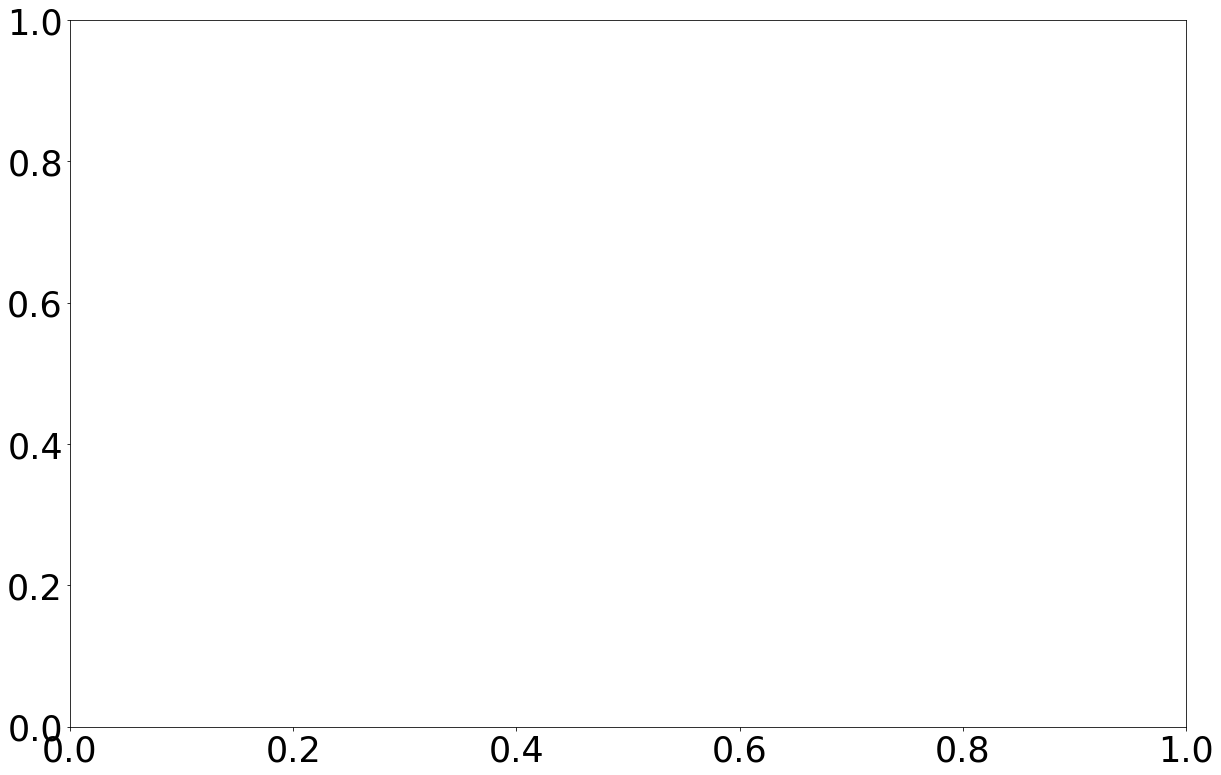

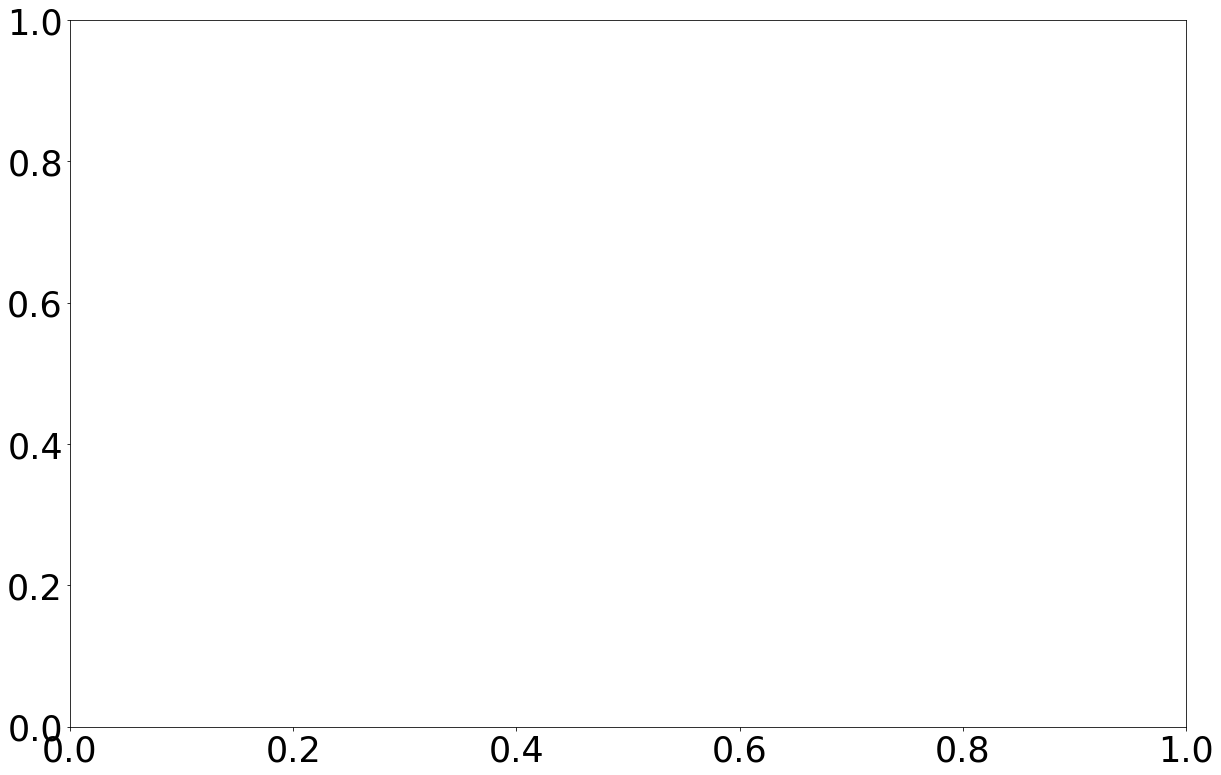

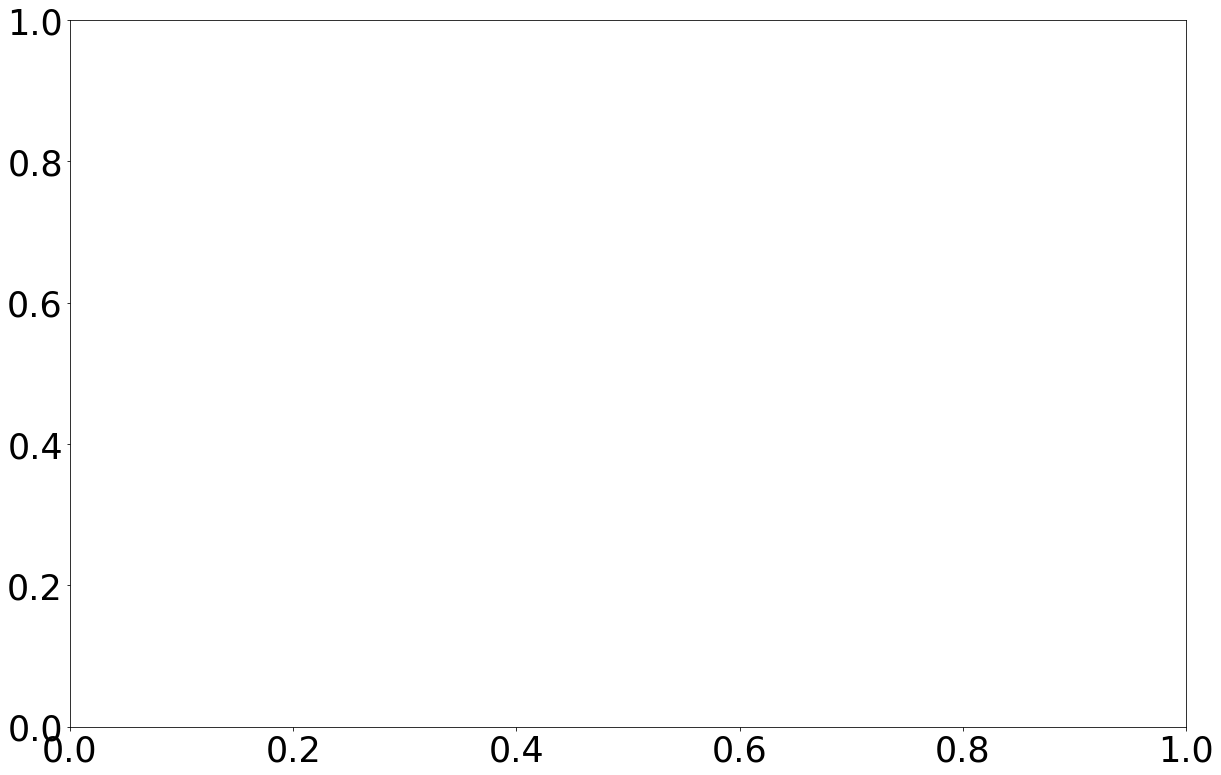

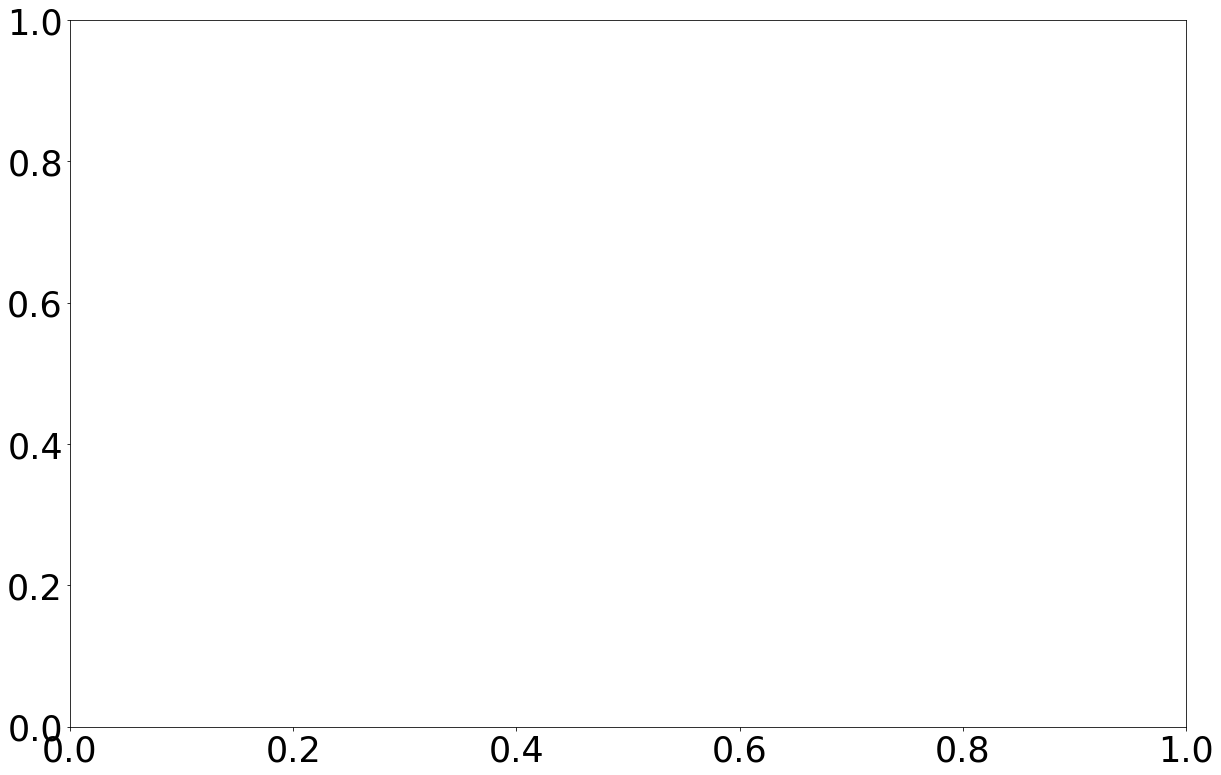

In [20]:
import numpy as np
from chembee.actions.benchmark_algorithms import (
    benchmark_standard,
    benchmark_cv_algorithms,
)

prefix = "mordred/aftercv/reduced_"
algorithms = [rf, knn, nnc, svc]
fitted_algs = []
DataSet.data["InertialShapeFactor"] = lip_data["InertialShapeFactor"]
DataSet.data["LogP"] = lip_data["LogP"]
X_data = DataSet.data.drop(columns=[target]).to_numpy()
y_data = DataSet.data[target].to_numpy()
X = np.array([X_data[:, 73], X_data[:, 72]]).T
y = y_data
for alg in algorithms: 
    fitted_algs.append(alg.fit(X_data, y_data))


fitted_clf_list = benchmark_cv_algorithms(
    algorithms=fitted_algs,
    names=names,
    X=X_data,
    y=y_data.astype(np.int32),
    feature_names=["LogP", "InertialShapeFactor"],
    file_name = "after_cv_benchmark",
    prefix=prefix,
    to_fit=False,
)

# Evaluation 

In [21]:
from chembee.actions.evaluation import screen_classifier_for_metrics
from chembee.plotting.evaluation import plot_collection
from chembee.utils.file_utils import load_json_from_file

from chembee.config.calibration.knn import KNeighborsClassifierAlgorithm
from chembee.config.calibration.random_forest import RandomForestClassifierAlgorithm
from chembee.config.calibration.mlp_classifier import MLPClassifierAlgorithm
from chembee.config.calibration.svc import NaivelyCalibratedSVC

import pandas as pd 
import numpy as np

import matplotlib.font_manager



fitted_clf = load_json_from_file(file_name = "mordred_cv.json")
rf = RandomForestClassifierAlgorithm(**fitted_clf["rfc"]["best_parameters"])
knn = KNeighborsClassifierAlgorithm(**fitted_clf["knn"]["best_parameters"])
nnc = MLPClassifierAlgorithm(**fitted_clf["mlpra"]["best_parameters"])
svc = NaivelyCalibratedSVC(**fitted_clf["rbf_svc"]["best_parameters"])
algorithms = [rf, knn, svc]

fitted_clf = []

for clf in algorithms:
    clf.fit(DataSet.X_train.to_numpy(), DataSet.y_train.to_numpy().astype(np.int32))
    fitted_clf.append(clf)



<Figure size 1080x1080 with 0 Axes>

In [22]:
metrics = screen_classifier_for_metrics(
    X_train=DataSet.X_train,
    X_test=DataSet.X_test,
    y_train=DataSet.y_train.astype(float),
    y_test=DataSet.y_test.astype(float),
    clf_list=fitted_clf,
)
file_name = make_full_filename(prefix="mordred/aftercv/", file_name="reduced_evaluation.json")
save_json_to_file(file_name=file_name, dictionary=metrics)

In [23]:
plot_collection(
    metrics, file_name=DataSet.name + "80-20_reduced_evaluation", prefix="plots/evaluation")

# Stratified Evaluation

In [24]:
from chembee.actions.evaluation import screen_classifier_for_metrics_stratified
from chembee.plotting.evaluation import plot_collection_stratified
n = 5
metrics = screen_classifier_for_metrics_stratified(X_data, y_true=y_data.astype(int), clf_list=algorithms, n=n)
file_name = make_full_filename(prefix="mordred/aftercv/", file_name="80-20_reduced_stratified_evaluation.json")
save_json_to_file(file_name=file_name, dictionary=metrics)


/home/julian/MasterThesis/venv/lib/python3.10/site-packages/chembee_actions/evaluation.py:249: RuntimeWarning: invalid value encountered in long_scalars
  return true_pos / (true_pos + false_pos)
/home/julian/MasterThesis/venv/lib/python3.10/site-packages/chembee_actions/evaluation.py:249: RuntimeWarning: invalid value encountered in long_scalars
  return true_pos / (true_pos + false_pos)
/home/julian/MasterThesis/venv/lib/python3.10/site-packages/chembee_actions/evaluation.py:249: RuntimeWarning: invalid value encountered in long_scalars
  return true_pos / (true_pos + false_pos)
/home/julian/MasterThesis/venv/lib/python3.10/site-packages/chembee_actions/evaluation.py:303: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (precision * recall) / (precision + recall)
/home/julian/MasterThesis/venv/lib/python3.10/site-packages/chembee_actions/evaluation.py:249: RuntimeWarning: invalid value encountered in long_scalars
  return true_pos / (true_pos + false_pos)


In [25]:
from chembee.plotting.evaluation import plot_collection_stratified
plot_collection_stratified(
    metrics, file_name=DataSet.name + "80-20_reduced_evaluation", prefix="plots/evaluation"
)

/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/julian/MasterThesis/venv/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

# Get the false predictions

The aim of the next part is to get the false predictions and their probability. The aim is to see if the prediction was inside the applicability domain. 

In [26]:
from chembee.actions.get_false_predictions import get_false_predictions

false_pos_indices = []
false_neg_indices = []
for i in range(100):
    clf = rf.fit(X_data, y_data.astype(np.int32))
    false_pos, false_neg = get_false_predictions(fitted_clf=clf, X_data = X_data, y_true=y_data.astype(np.int32))
    false_pos_indices+= false_pos
    false_neg_indices+= false_neg

In [27]:
uniques_pos = np.unique(false_pos_indices)
uniques_pos

array([  46,  627, 1088, 1112, 1114, 1744, 2578, 2866])

In [28]:
uniques_neg =  np.unique(false_neg_indices)
uniques_neg

array([ 338,  812,  861,  971, 1495, 1584, 2156, 2207, 2210, 2214, 2324,
       2356, 2579, 2862, 2983])

In [29]:
def count_occurences(vals, arr):
    occurences = []
    for val in vals: 
        occ = np.count_nonzero(arr == val)
        print(val, ":", occ)
        occurences.append(occ)
    return occurences
occ_neg = count_occurences(uniques_neg, false_neg_indices)
print("positives")
occ_pos = count_occurences(uniques_pos, false_pos_indices)

338 : 1
812 : 1
861 : 1
971 : 1
1495 : 3
1584 : 1
2156 : 2
2207 : 2
2210 : 1
2214 : 1
2324 : 1
2356 : 1
2579 : 82
2862 : 2
2983 : 1
positives
46 : 1
627 : 1
1088 : 2
1112 : 1
1114 : 3
1744 : 1
2578 : 18
2866 : 4


In [30]:
from chembee.preparation.processing import get_mols_from_supplier

impurities_pos = np.unique(false_pos_indices).tolist()
impurities_pos = get_mols_from_supplier(supplier=DataSet.mols, indices=impurities_pos)

In [31]:
impurities_pos

In [32]:
impurities_neg = np.unique(false_neg_indices).tolist()
impurities_neg = get_mols_from_supplier(supplier=DataSet.mols, indices=impurities_neg)

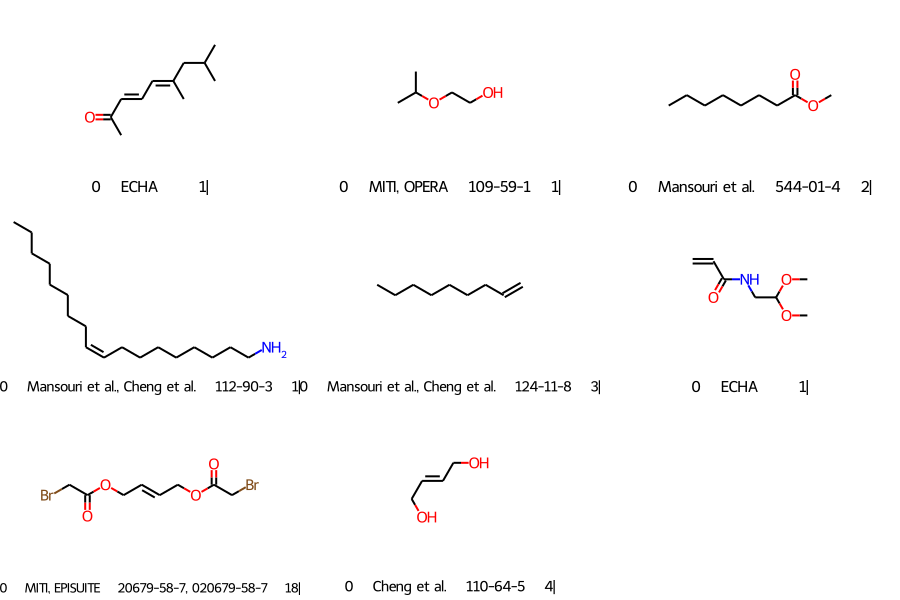

In [33]:
from rdkit.Chem import Draw 

img = Draw.MolsToGridImage(impurities_pos,molsPerRow=3,subImgSize=(300,200),legends=[x.GetProp("ReadyBiodegradability") + "    " + x.GetProp("Dataset") + "    " + x.GetProp("CASNR") +  "    " + str(occ_pos[i])+ "|" for i,x in enumerate(impurities_pos)], returnPNG = False)    
img.save("false_pos_mordred_100_times.png")
img

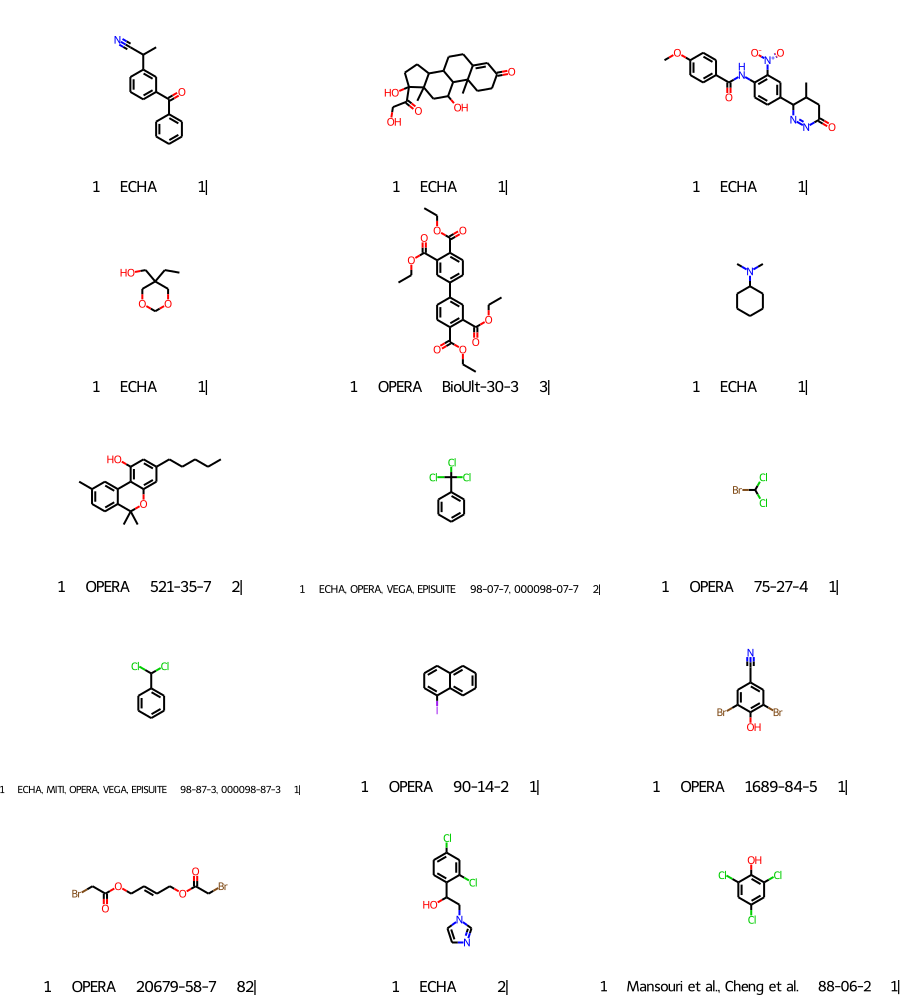

In [34]:
from rdkit.Chem import Draw 

img = Draw.MolsToGridImage(impurities_neg,molsPerRow=3,subImgSize=(300,200),legends=[x.GetProp("ReadyBiodegradability") + "    " + x.GetProp("Dataset") + "    " + x.GetProp("CASNR") +  "    " + str(occ_neg[i])+ "|" for i,x in enumerate(impurities_neg)],  returnPNG=False)
img.save("80-20_false_neg_mordred_100_times.png")
img

In [35]:
np.unique(false_pos_indices).tolist()

[46, 627, 1088, 1112, 1114, 1744, 2578, 2866]

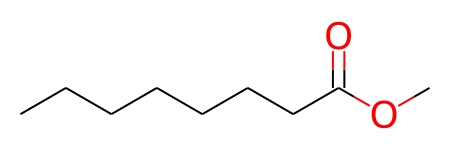

In [36]:
DataSet.mols[1088]

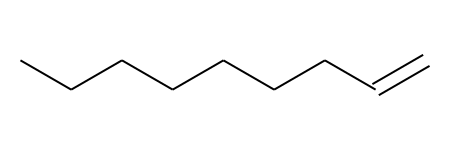

In [37]:
DataSet.mols[1114]

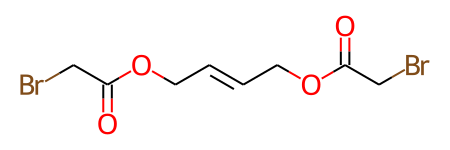

In [38]:
DataSet.mols[2579]

In [39]:
!pip install pip install pyADAqsar

In [40]:
from chembee.preparation.processing import calculate_mordred_descriptors, calculate_lipinski_desc, convert_mol_to_inchi, convert_mols_to_morgan_fp, convert_mols_to_rdk_fp,  get_mols_from_supplier
from chembee.actions.search import  screen_fingerprints_against_data, get_similar_compounds


false_neg = false_neg
false_pos = false_pos
false_pos_mols = get_mols_from_supplier(supplier=DataSet.mols, indices=false_pos)
false_neg_mols = get_mols_from_supplier(supplier=DataSet.mols, indices=false_neg)
mols = DataSet.mols
base_mols = get_mols_from_supplier(supplier=DataSet.mols, indices=[i for i in range(len(mols))])
assert(type(base_mols) == (type([])))
#Morgan
fp_pos = convert_mols_to_morgan_fp(false_pos_mols, radius=3, n_bits=2048)
fp_neg = convert_mols_to_morgan_fp(false_neg_mols, radius=3, n_bits=2048)
fp_base = convert_mols_to_morgan_fp(base_mols, radius=3, n_bits=2048)
result_mfp = screen_fingerprints_against_data(fp_pos, fp_base)
result_mfn = screen_fingerprints_against_data(fp_neg, fp_base)
#RDKit FP
fp_test = convert_mols_to_rdk_fp(false_pos_mols)
fn_test = convert_mols_to_rdk_fp(false_pos_mols)
fp_base = convert_mols_to_rdk_fp(base_mols)
result_rdk_fp = screen_fingerprints_against_data(fp_test, fp_base)
result_rdk_fn = screen_fingerprints_against_data(fn_test, fp_base)
#ADA
result_ada = get_similar_compounds(compounds_of_interest=X_data[false_pos], compounds = X_data)

0it [00:00, ?it/s]


In [41]:
false_pos.append(1088)

In [42]:
false_pos

[1088]

In [43]:
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np 
from sklearn.metrics import accuracy_score
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=120, shuffle=True)
classifier = knn
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

accuracies = []
interesting_compounds = []
for i, (train, test) in enumerate(cv.split(X_data, y_data.astype(np.int32))):
    classifier.fit(X_data[train], y_data.astype(np.int32)[train])
    y_pred = classifier.predict(X_data[test])
    score = accuracy_score(y_pred, y_data.astype(np.int32)[test])
    if score <= 0.6:
        interesting_compounds.append(test)
    accuracies.append(float(score))

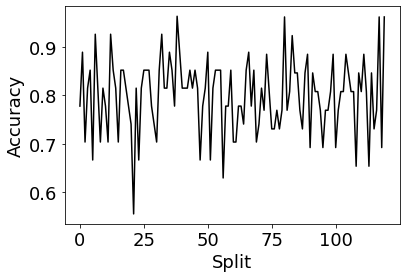

In [44]:
matplotlib.rcParams.update({"font.size": 18})
plt.plot(accuracies, color = "black")
plt.ylabel("Accuracy")
plt.xlabel("Split")
plt.savefig("120_5_fold.png", dpi=300)

# Applicability Domain

In [45]:
DataSet.X_train.columns.tolist()

['ATS3dv',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpMax_A',
 'SpDiam_A',
 'SpAD_A',
 'SpMAD_A',
 'LogEE_A',
 'VE1_A',
 'VE2_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'VR3_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nSpiro',
 'nBridgehead',
 'nHetero',
 'nH',
 'nB',
 'nC',
 'nN',
 'nO',
 'nS',
 'nP',
 'nF',
 'nCl',
 'nBr',
 'nI',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ABC',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m']

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 31.14it/s]


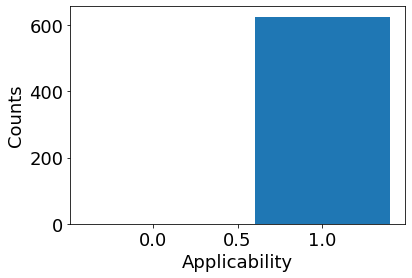

In [46]:
from pyADA import ApplicabilityDomain
import numpy as np


(

    DataSet.X_train,
    DataSet.X_test,
    DataSet.y_train,
    DataSet.y_test,
) = DataSet.make_train_test_split(
    DataSet.data, split_ratio=split_ratio, y_col=target, shuffle=True
)
X_data = DataSet.data.drop(columns=[target]).to_numpy()
y_data = DataSet.data[target].to_numpy()

threshold_step = (0, 1.05, 0.05)
ad = ApplicabilityDomain(verbose=True)
res = ad.fit(
        model=rf,
        base_train=DataSet.X_train.to_numpy(),
        base_test=DataSet.X_test.to_numpy(),
        y_true=DataSet.y_test.to_numpy().astype(np.int32),
        threshold_reference="max",
        threshold_step=threshold_step,
        similarity_metric="tanimoto",
        alpha=1,
        beta=1,
        metric_avaliation="auc",
    )
import matplotlib.pyplot as plt 

counts = []
for i, key in enumerate(res.keys()): 
    count = len(res[key][1])
    counts.append(count)

plt.bar(np.arange(0, 1.05, 0.05), counts)
plt.xlabel("Applicability")
plt.ylabel("Counts")
plt.savefig("80-20-applicability_fingerprints.png", dpi = 300)


In [47]:
assert DataSet.X_train.shape[1] == DataSet.X_test.shape[1]